# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

But before we can get started, there's the bookkeeping stuff, the admin things. Do watch it - the material below tells you about key elements of how to do well in class, assignments and stuff.

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

# Part 0: The admin stuff 
### (Why we use "Peer Evaluations"-Edition)

We use the system [Peergrade.io](http://peergrade.io/) to get you better feedback and make you smarter. In the video below, I explain why that is the case. There are a lot of good reasons that peer evaluations are great, so watch the video :)

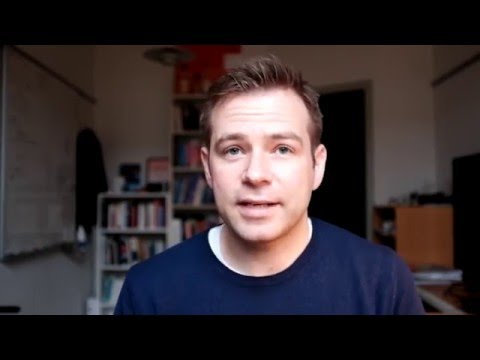

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("-TC18KgpiIQ",width=800, height=450)

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

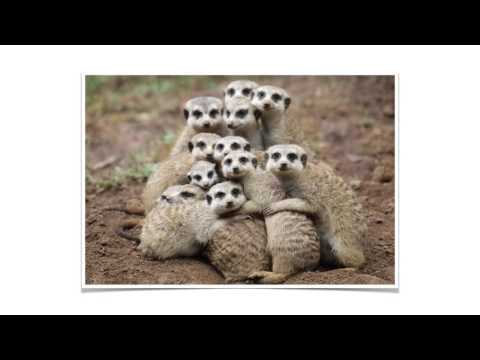

In [ ]:
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> **Exercises**: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * **What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**
>> The real-world networks are more diverse and have more outliers than random networks. The random network underestimates the frequency of both high and low degree nodes. Instead the random network model predicts a larger number of nodes in the vicinity of ‹k› than seen in real networks.
> * **List the four regimes that characterize random networks as a function of $\langle k \rangle$.**
>> Subcritical Regime: 0 ‹ ‹k› ‹ 1 \
>>Critical Point: ‹k› = 1\
>>Supercritical Regime: ‹k› › 1\
>>Connected Regime: ‹k› › lnN\

> * **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?**
>> Based on the measured data the local clustering coefficient C(k) decreases with the node degrees and is largely independent of the system size. But in a random network it's independent of the node’s degree and ‹C› depends only on the system size as 1/N. The clustering coefficient works different for these types of networks.

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> **Exercises**: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

In [ ]:
import networkx as nx

G1 = nx.watts_strogatz_graph(n=500, k = 4, p=0)
G2 = nx.watts_strogatz_graph(n=500, k = 4, p=0.1)
G3 = nx.watts_strogatz_graph(n=500, k = 4, p=1)

d1=nx.average_shortest_path_length(G1)
d2=nx.average_shortest_path_length(G2)
d3=nx.average_shortest_path_length(G3)

print(f"Average shortest path lenght :\n <d>(G1)={d1} \n <d>(G2)={d2}\n <d>(G3)={d3}")



Average shortest path lenght :
 <d>(G1)=62.875751503006015 
 <d>(G2)=7.637931863727455
 <d>(G3)=4.7573066132264525


When p = 1 all the links with the k = 4 nearest neighbours where replaced with a new edge with uniformly random choice of existing node. It makes the network more randomized 

In [ ]:
p_list =[0,0.01,0.03,0.05,0.1,0.2,0.6,0.8]

for p in p_list:
    G = nx.watts_strogatz_graph(n=500, k = 4, p=p)
    d=nx.average_shortest_path_length(G)
    print(f"For p={p}  <d>={d}")

For p=0  <d>=62.875751503006015
For p=0.01  <d>=26.23462124248497
For p=0.03  <d>=13.166517034068136
For p=0.05  <d>=9.108296593186372
For p=0.1  <d>=7.453170340681362
For p=0.2  <d>=6.161130260521042
For p=0.6  <d>=4.8938436873747495
For p=0.8  <d>=4.797490981963928


Text(0.5, 1.0, 'Average distance in relation to rewiring probablity')

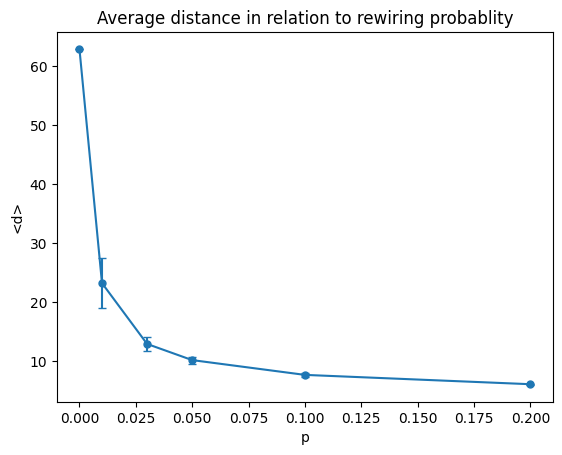

In [ ]:
import numpy as np

p_list =[0,0.01,0.03,0.05,0.1,0.2]

d_list=[]
std_list=[]
for p in p_list:
    d=[]
    for _ in range(50):
        G = nx.watts_strogatz_graph(n=500, k = 4, p=p)
        d.append(nx.average_shortest_path_length(G))
    std_list.append(np.std(d))
    d_list.append(sum(d)/len(d))

#plot graph

import matplotlib.pyplot as plt
plt.errorbar(p_list, d_list, yerr=std_list, fmt='.-', ms=10, capsize=3)
plt.xlabel('p')
plt.ylabel('<d>')
plt.title('Average distance in relation to rewiring probablity')



 The plot shows the relation between the average distance ⟨d⟩ and rewiring probablity p. The data was colected based on 50 different graphs for each of the 6 probabilities. As we can observe the path length decreases when probability of re-wiring is growing. Standard deviation of observations also decreased for a larger probabilities. 

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

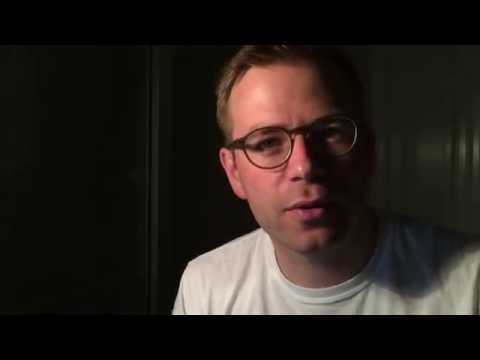

In [ ]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> **Exercises**: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**
>> *The three slope dependent regimes are:*

>> *1. **Anomalous regime: $\gamma < 2$** Implies that the exponent of equation 4.18 is larger than 1. The result is that the number of links connected to the largest hub grows faster than the size of the network, leading to this largest hub to run out of nodes to connect to for a sufficiently large N. Moreover, in this regime the average degree <k> diverges when N tends to infinity.*

>> *2. **Scale-free regime: $2 < \gamma < 3$** In this regime the first moment of the degree distribution is finite but the second and higher moments diverge as N → ∞. Consequently scalefree networks in this regime are ultra-small.*


>> ***3. Random Network Regime:  $\gamma > 3$** According to (4.20) for γ > 3 both the first and the second moments are finite. For all practical purposes the properties of a scale-free network in this regime are difficult to distinguish from the properties a random network of similar size.*

>> *In summary, we find that the behavior of scale-free networks is sensitive to the value of the degree exponent γ. Theoretically the most interesting regime is 2 ‹ γ ‹ 3, where 〈k2〉 diverges, making scale-free networks ultra-small.*


> * **What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**

>> *1. **Non Preferential Attachment: $\alpha = 0$** blabal*
>> *2. **Sublinear Regime: $ 0 <\alpha < 1$** blbal*
>> *3. **Linear Regime: $\alpha = 1$** blabla*
>> *4. **Superlinear Regime: $\alpha > 1$** blbal*



> **We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:**
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)
> 

In [ ]:
import networkx as nx
import random as random

# Create a graph with a single link 
#G1.clear()
G1 = nx.Graph()
G1.add_edge(1,2)
print(f'This graph has: {G1.number_of_edges()} links')

This graph has: 1 links


In [ ]:
# Add 1 node connecting one of the existing nodes in proportion to their degree.
    # Generate a list of edges (from the graph?), and flatten it:
G1.add_node(3)
G1.add_edge(2,3)
list_edges = list(G1.edges())
list_edges

[(1, 2), (2, 3)]

In [ ]:
# flatten list edges (list of nodes)
connected_nodes=list(sum(list_edges,()))
connected_nodes

[1, 2, 2, 3]

In [ ]:
# list of degrees
# select a random node from the flattened list of edges. The probability of the selected node corresponds to its degree.
new_node = random.choices(connected_nodes) 
new_node

[1]

In [ ]:
# Add this new node to the graph 
G1.add_nodes_from(new_node)
print(f'This graph has: {G1.number_of_edges()} links')
print(f'This graph has: {G1.number_of_nodes()} nodes')


This graph has: 2 links
This graph has: 3 nodes


In [ ]:
# Keep going until you have 100 nodes
G1.clear()
G1 = nx.Graph()
G1.add_edge(1,2)
i = 0

for i in range(3,101):
    list_edges = list(G1.edges())
    connected_nodes=list(sum(list_edges,()))
    new_edge_node = random.choices(connected_nodes) 
    G1.add_node(i)
    G1.add_edge(i,new_edge_node[0])

In [ ]:
print(f'This graph has: {G1.number_of_edges()} links')
print(f'This graph has: {G1.number_of_nodes()} nodes')

This graph has: 99 links
This graph has: 100 nodes


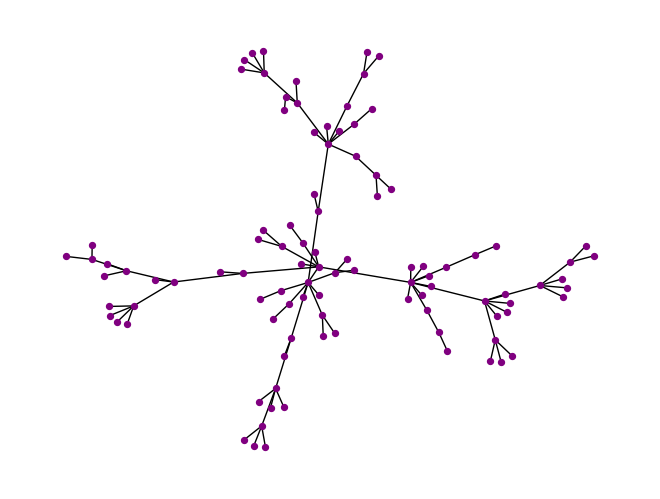

In [ ]:
# Plot the network
nx.draw(G1,
        node_size = 18,
        with_labels=False, 
        font_weight='bold',
        node_color = 'purple'
        
)

In [ ]:
# Add more nodes until 5000
G1.clear()
G1 = nx.Graph()
G1.add_edge(1,2)
i = 0

for i in range(3,5001):
    list_edges = list(G1.edges())
    connected_nodes=list(sum(list_edges,()))
    new_edge_node = random.choices(connected_nodes) 
    G1.add_node(i)
    G1.add_edge(i,new_edge_node[0])


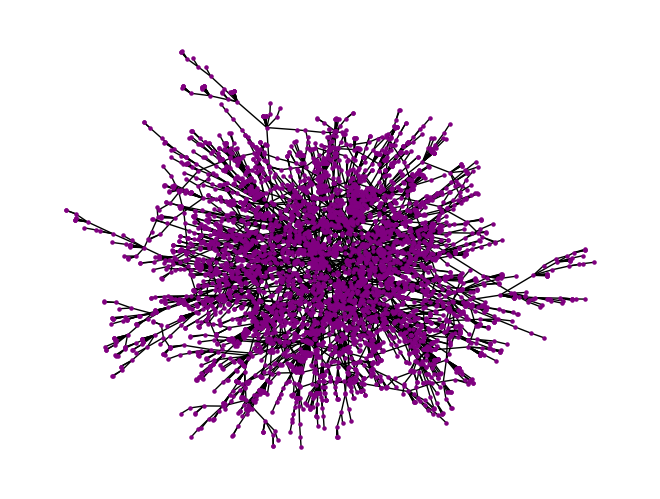

In [ ]:
# Plot the network again
nx.draw(G1,
        node_size = 5,
        with_labels=False, 
        font_weight='bold',
        node_color = 'purple'
        
)

In [ ]:
# Max and min degree

#get nodes from the graph
list_of_nodes = G1.nodes()

#dictionary with the nodes and their degree 
dic_nodes_degrees = dict(G1.degree(list_of_nodes))
    
# get max degree (value) and node (key)
def get_maxmin_degree(d, max_degree = True):
    """
    get_maxmin_degree() extracts the node and the degree of a dictionary of given tuples from a graph

    :param d (dictionary): dictionary of nodes and their degree
    :param max_degree (boolean): True if max degree, False if min degree

    :returns: tuple (node,degree) with max or min value

    """
    if max_degree == True:
        max_key = max(d, key=d.get)
        reslt_pair = tuple([max_key,d[max_key]])
        #print(reslt_pair)
    else:
        min_key = min(d, key=d.get)
        reslt_pair = tuple([min_key,d[min_key]])
        #print(reslt_pair)
    return reslt_pair

node_max_degree = get_maxmin_degree(dic_nodes_degrees, max_degree= True)   
node_min_degree =  get_maxmin_degree(dic_nodes_degrees, max_degree = False)  
print (f'The node with the max degree is {node_max_degree}')
print (f'The node with the min degree is {node_min_degree}')

The node with the max degree is (1, 105)
The node with the min degree is (7, 1)


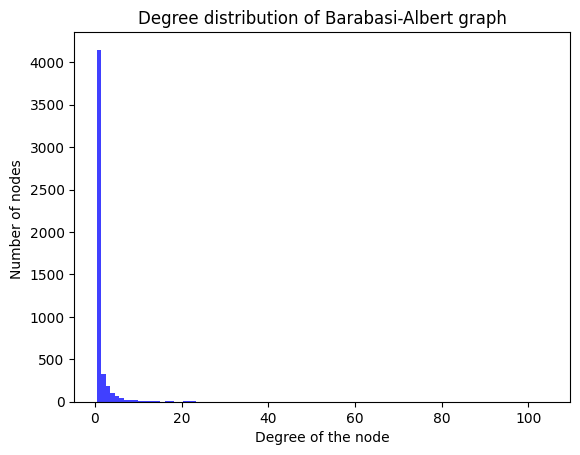

In [ ]:
# Bin the degree distribution using np.histogram
import numpy as np
import matplotlib.pyplot as plt

x = [val for (node, val) in G1.degree()]
counts, edges = np.histogram(x, bins=100)

plt.bar(edges[:-1], counts, width=np.diff(edges), facecolor='b', alpha=0.75)
plt.title("Degree distribution of Barabasi-Albert graph")
plt.xlabel('Degree of the node')
plt.ylabel('Number of nodes ')
plt.show()

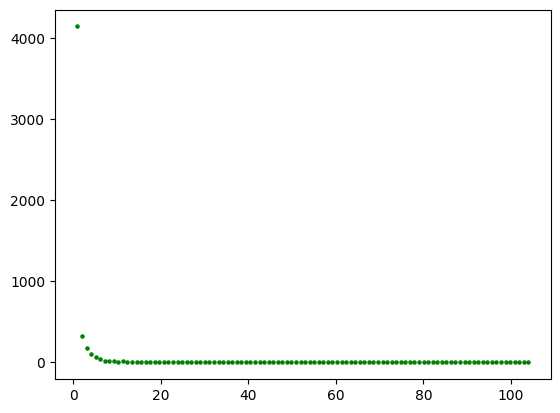

In [ ]:
# Plot the degree distribution 
plt.scatter(edges[:-1],counts, s = 5, c = 'green')

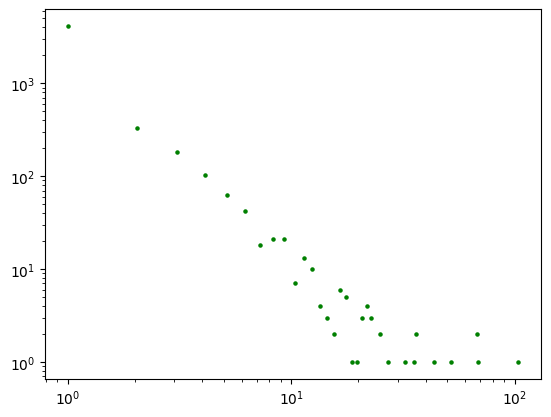

In [ ]:
plt.scatter(edges[:-1],counts, s = 5, c = 'green')
plt.yscale('log',base=10)
plt.xscale('log',base=10) 

*Exercises*: The friendship paradox

> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:
> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1.5$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say more than 5000 nodes.
>     * In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
>     * The sequence generated using the method mentioned above needs to be rounded as well.
>     * Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have an odd sum, so if your sequence turns out odd, just choose an element and add 1 to its degree.
> - Did you reason correctly above? For what fraction is the friendship paradox true now?|

In [ ]:
paradox = []

for _ in range(1000):

    i_node=random.choice(list(G1.nodes))
    i_degree=G1.degree(i_node)
    #print(f'i node degree =  {i_degree}')



    i_neighbors = list(G1.neighbors(i_node))

    neighbors_degree=[]
    for node in i_neighbors:
        neighbors_degree.append(G1.degree(node))

    average_neighbor_degree= sum(neighbors_degree)/len(neighbors_degree)
    #print("Avarage neighbor degree: {}")

    if average_neighbor_degree > i_degree:
        paradox.append(True)
    else:
        paradox.append(False)

print(f" Paradox was true {paradox.count(True)} times")
    

 Paradox was true 848 times


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#create a graph with degrees following a power law distribution

#I believe we can eliminate this loop to find s by using the call   
#nx.utils.create_degree_sequence(100,powerlaw_sequence) with 
#appropriate modification
while True:  
    s=[]
    while len(s)<5000:
        nextval = int(nx.utils.powerlaw_sequence(1, 1)[0]) #100 nodes, power-law exponent 2.5
        if nextval!=0:
            s.append(nextval)
    if sum(s)%2 == 0:
        break
G = nx.configuration_model(s)
G=nx.Graph(G) # remove parallel edges
G.remove_edges_from(G.selfloop_edges())

#draw and show graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

ZeroDivisionError: float division by zero

In [ ]:
sequence = nx.random_powerlaw_tree_sequence(n=5000,gamma=1.5, tries=50000000)
G = nx.configuration_model(sequence)
len(G)

actual_degrees = [d for v, d in G.degree()]
actual_degrees == sequence

G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

KeyboardInterrupt: 

**Exercises**: Growth without preferential attachment

> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. Follwo the steps below for success
> 
> * Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, *but have the incoming nodes connect to the existing nodes with* **equal probability**. Let's call this the Sune-network.
> * Generate an ER network of same size and same $p$ as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

>> _blablabla_

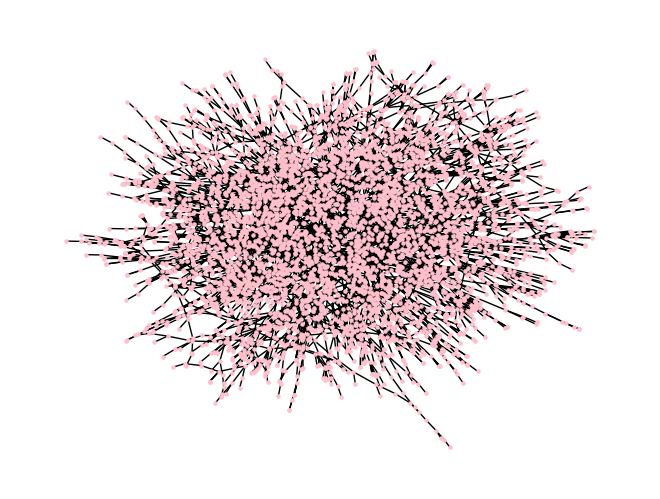

In [ ]:
# Sune-Network: To avoid preferential attachment we will just select a random node every time from the all nodes in the graph
G2 = nx.Graph()
G2.add_edge(1, 2)
G2.nodes()

i=0
for i in range(3,5001):
    list_nodes = list(G2.nodes())
    new_edge=random.choices(list_nodes)
    # add another node with random linking to the other existing ones
    G2.add_node(i)
    G2.add_edge(i, new_edge[0]) 


# Plot the network 
nx.draw(G2,
        node_size = 5,
        with_labels=False, 
        font_weight='bold',
        node_color = 'pink'
        
)

In [ ]:
# Generate an ER network of same size and same p as the Sune-network.

# Import package
from networkx.generators.random_graphs import erdos_renyi_graph


# Calculate k
k=np.mean(list(dict(G2.degree).values()))
print(k)

# Create ER net
G3 = erdos_renyi_graph(5000,p=k/5000)

1.9996


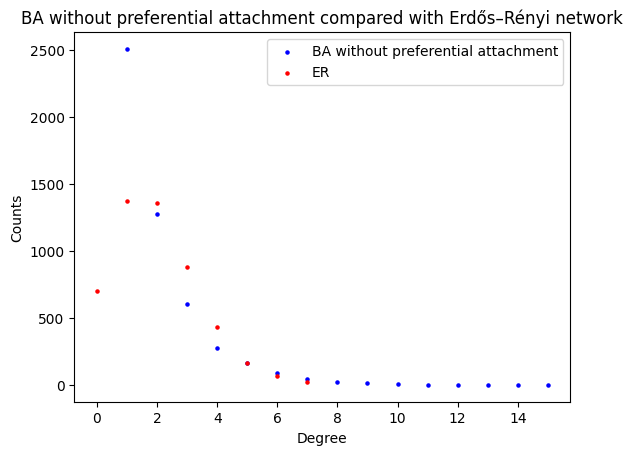

In [ ]:
#Plot the two degree distribution in the same plot. Compare and contrast. 

#BA no preferential attachment
bins=list(range(min(dict(G2.degree).values()),max(dict(G2.degree).values())+1,1))
n, bins = np.histogram(list(dict(G2.degree).values()),bins)

# ER network
bins2=list(range(min(dict(G3.degree).values()),max(dict(G3.degree).values())+1,1))
n2, bins2 = np.histogram(list(dict(G3.degree).values()),bins2)

plt.figure()
plt.scatter(bins[:-1],n,s=5, c='blue',label='BA without preferential attachment')
plt.scatter(bins2[:-1],n2,s=5, c='red',label='ER')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('BA without preferential attachment compared with Erdős–Rényi network')
plt.legend()
plt.show()

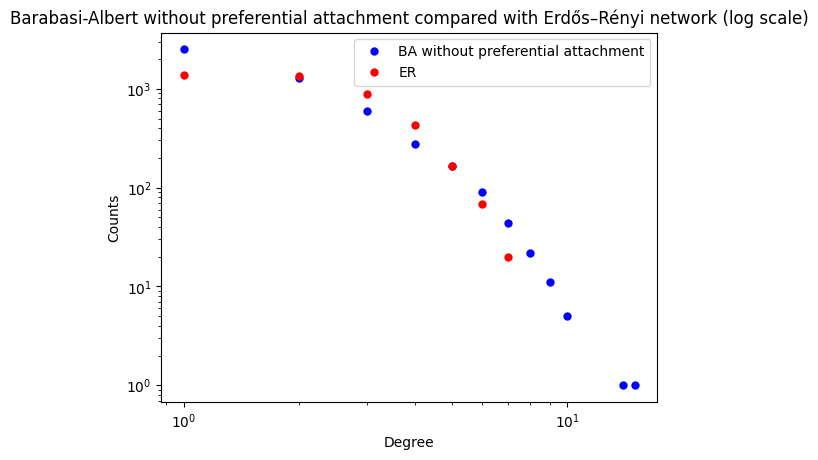

In [ ]:
# Convert to logscale

fig = plt.figure()
ax = plt.gca()
ax.plot(bins[:-1],n, 'o', c='blue', markeredgecolor='none',label='BA without preferential attachment')
ax.plot(bins2[:-1],n2, 'o', c='red', markeredgecolor='none',label='ER')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Barabasi-Albert without preferential attachment compared with Erdős–Rényi network (log scale)')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d3b23c38-3361-49e4-90c4-a3542fc22751' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>